# Introduction

**Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.**

**Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.**

**The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).**

**you can find the data [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)**

> **let's speak with python**

![Image](https://th.bing.com/th/id/R.39ef60baa2a64dd88d5faf50d799e9ee?rik=v164wWmLhx%2f4QQ&pid=ImgRaw&r=0)

In [261]:
Agenda = {
    1:"Importing what I want",
    2:"Loading our data",
    3:"Lets look at age column",
    4:"The main question",
    5:"CONCLUSION OF DATA ANALYSIS",
    6:"Data Preprocessing",
    7:"CONCLUSION OF DATA PREPROCESSING",
    8:"Data Preprocessing for Building Models",
    9:"Saving our data"
}

Agenda

{1: 'Importing what I want',
 2: 'Loading our data',
 3: 'Lets look at age column',
 4: 'The main question',
 5: 'CONCLUSION OF DATA ANALYSIS',
 6: 'Data Preprocessing',
 7: 'CONCLUSION OF DATA PREPROCESSING',
 8: 'Data Preprocessing for Building Models',
 9: 'Saving our data'}

## 1. Importing what I want

In [262]:
# importing some lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore error
import warnings 
warnings.filterwarnings("ignore")

## 2. Loading our data

In [263]:
train = pd.read_csv("../input/banking-dataset-marketing-targets/train.csv", sep = ";")

Lets try with terining data 

## 3. Analysis of trainin data

In [264]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [265]:
train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [266]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [267]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 3.1 Lets look at age column (outliers)

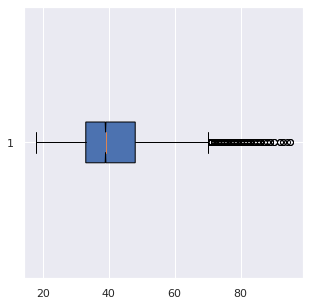

In [268]:
np.random.seed(42)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
bp = ax.boxplot(train["age"] , patch_artist = True,
               notch = True , vert = 0)
plt.show()

<AxesSubplot:>

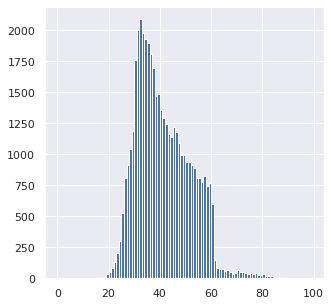

In [269]:
bin_values = np.arange(start = 0 , stop = 100 , step = 1)
# print(bin_values)

train["age"].hist(bins=bin_values)

<AxesSubplot:xlabel='age', ylabel='Density'>

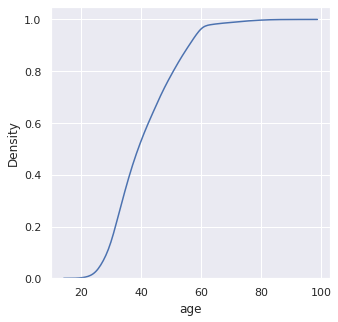

In [270]:
sns.kdeplot(train.age, cumulative = True)

In [271]:
string_columns = list(train.dtypes[train.dtypes == "object"].index)
string_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [272]:
for i in train.columns:
    if i in string_columns:
        results = train[i].value_counts()
        print(results, "\n")
        print("-/"*20, "\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

no     44396
yes      815
Name: default, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

yes    25130
no     20081
Name: housing, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

no     37967
yes     7244
Name: loan, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

-/-/-/-/

<AxesSubplot:xlabel='y', ylabel='Count'>

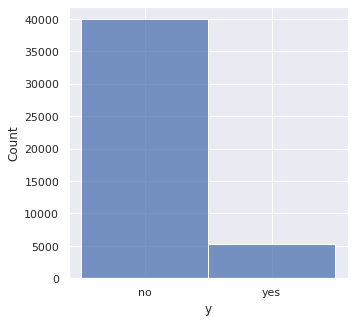

In [273]:
sns.histplot(train.y)

## 4. The main question is what are the most characteristic features of the people who respond to the campaign and register for deposits?

> **Now we will try to dig into that data in order to extract accurate answers to this question. The answer may not be complete, but I will try to answer it accurately.**

## 4.1 Balance column

In [274]:
train["balance"].max(), train["balance"].min()

(102127, -8019)

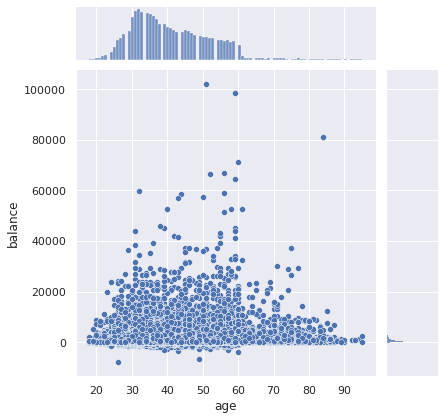

In [275]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.jointplot(x = train.age, y = train.balance)

## 4.1.1 Management department

In [276]:
manage = train[(train["job"] == "management")]
print(len(manage))

9458


<AxesSubplot:xlabel='y', ylabel='Count'>

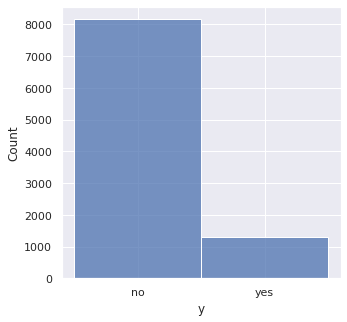

In [277]:
sns.set(rc={"figure.figsize":(5, 5)})
sns.histplot(manage["y"])

In [278]:
manage_yes = manage[manage["y"] == "yes"]

<AxesSubplot:xlabel='marital', ylabel='Count'>

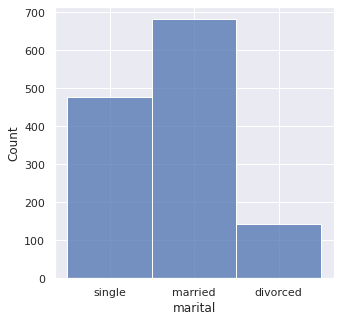

In [279]:
sns.histplot(manage_yes["marital"])

<AxesSubplot:xlabel='marital', ylabel='Count'>

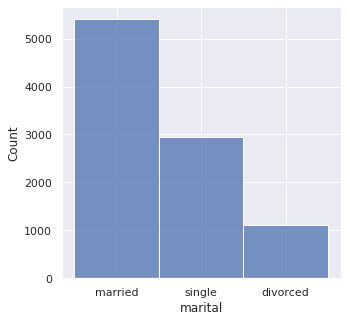

In [280]:
sns.histplot(manage["marital"])

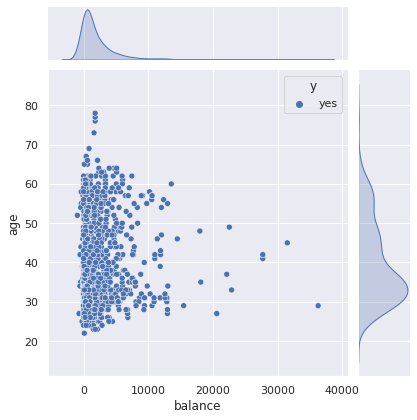

In [281]:
sns.jointplot(x = "balance", y = "age",
             hue = "y",
             data = manage_yes)

**Target ages Accepted to register in term deposits, whose ages are limited to approximately 22 to 65 years intensively.**

**We note that most of the management workers are married in the first place, then bachelors secondly.
And when allocating excavations to workers in the field of management and those who participated in a deposit for the sake of those who are married.**

## 4.2 Education column

In [282]:
train["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

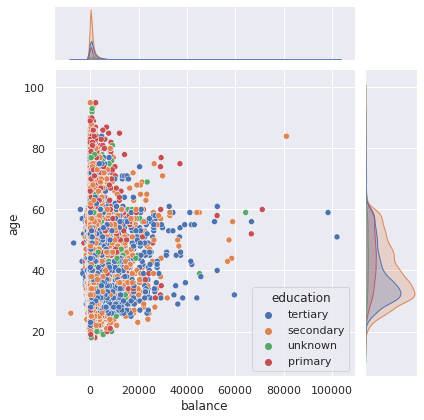

In [283]:
sns.jointplot(x = "balance", y = "age",
             hue = "education",
             data = train)

**We note that in the period before the sixties there are many people who obtained post-secondary degrees, which are known as the (tertiary)**

In [284]:
"""
train['education'] = train['education'].map({"secondary":1,"tertiary":2,"primary":3,
                "unknown":4})
train['education'] = pd.to_numeric(train['education'], errors='coerce')
""";

In [285]:
#sns.kdeplot(train.education, cumulative = True)

<AxesSubplot:xlabel='education', ylabel='balance'>

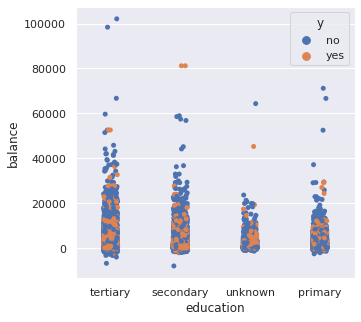

In [286]:
sns.stripplot(train.education, # it it x axis
             train.balance,    # it is y axis
             hue = train.y)

**As we have said before, people who are willing or who are the most registered are tertiary**

## 4.3 Job column

In [287]:
train.groupby("y").first()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
yes,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown


In [288]:
train["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## 4.3.1 Admin department

In [289]:
train[train["job"]=="admin."].groupby("y").first()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown
yes,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown


9458


<AxesSubplot:xlabel='y', ylabel='Count'>

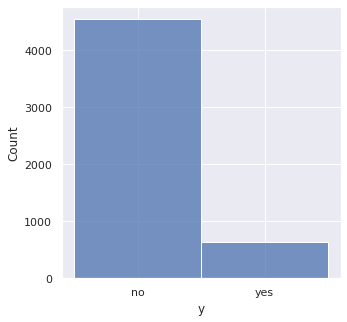

In [290]:
admin = train[(train["job"] == "admin.")]
print(len(manage))

sns.histplot(admin["y"])

In [291]:
admin_yes = admin[admin["y"] == "yes"]
len(admin_yes)

631

<AxesSubplot:xlabel='marital', ylabel='Count'>

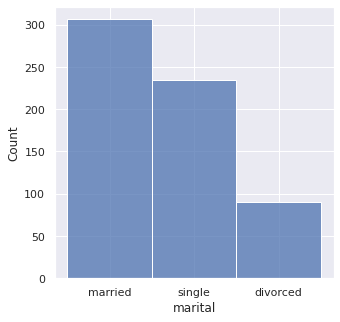

In [292]:
sns.histplot(admin_yes["marital"])

<AxesSubplot:xlabel='education', ylabel='Count'>

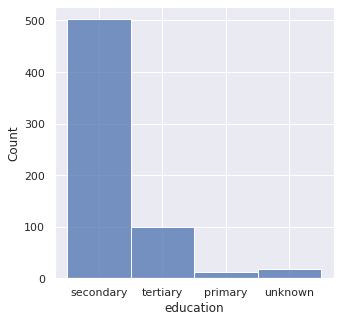

In [293]:
sns.histplot(admin_yes["education"])

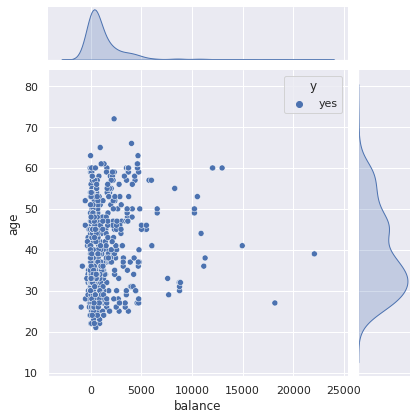

In [294]:
sns.jointplot(x = "balance", y = "age",
             hue = "y",
             data = admin_yes)

**Here we note that most of the target ages, which were accepted to register for term deposits, are intensely confined between 20 years and approximately 60 years.**

## 4.4 Housing column 

In [295]:
train["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [296]:
train[["housing","y"]].groupby("y").last()

,housing
y,
no,no
yes,no


<AxesSubplot:xlabel='housing', ylabel='balance'>

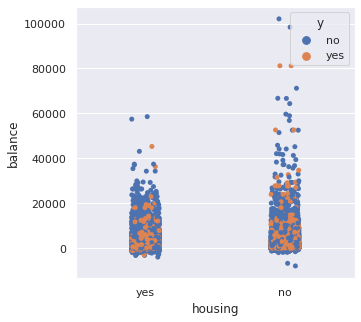

In [297]:
sns.stripplot(train.housing, # it it x axis
             train.balance,    # it is y axis
             hue = train.y)

**From the previous figure, we note that taking out a home loan does not play a major role in registering for term deposits, but this may significantly affect other elements.**

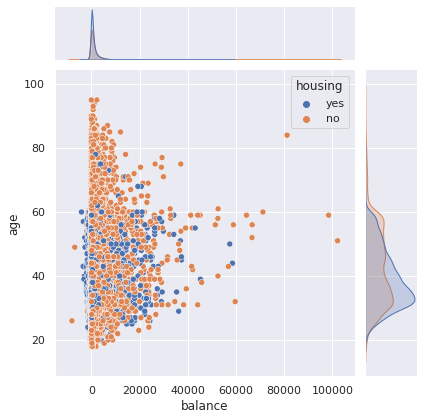

In [298]:
sns.jointplot(x = "balance", y = "age",
             hue = "housing",
             data = train)

**Most individuals do not have a loan on their homes, but most of the individuals who have a loan on their homes are concentrated between the ages of 25 to 60 years, and this age group is the main target, so we may face some problems in choosing the characteristics that distinguish the target people.**

<AxesSubplot:xlabel='y', ylabel='balance'>

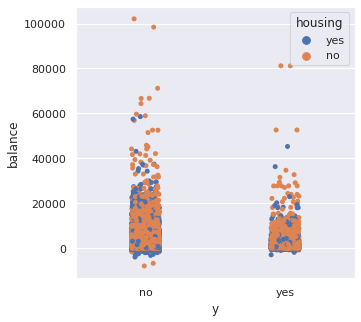

In [299]:
sns.stripplot(train.y,         # it it x axis
             train.balance,    # it is y axis
             hue = train.housing)

<AxesSubplot:xlabel='education', ylabel='balance'>

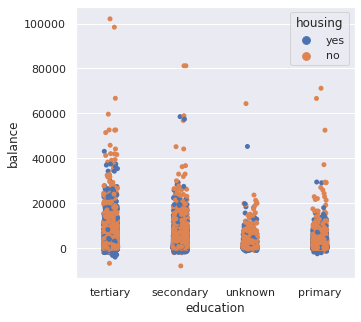

In [300]:
sns.stripplot(train.education, # it it x axis
             train.balance,    # it is y axis
             hue = train.housing)

**From the previous figure, we note that the element of whether the individual took a loan on the house or not is an ineffective factor to a large degree, and therefore we can say that it is okay whether the person has taken a loan on the house or not so that he can register in term deposits.**

## 4.5 Loan column

In [301]:
train["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='balance'>

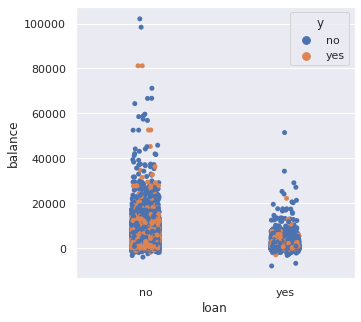

In [302]:
sns.stripplot(train.loan, # it it x axis
             train.balance,    # it is y axis
             hue = train.y)

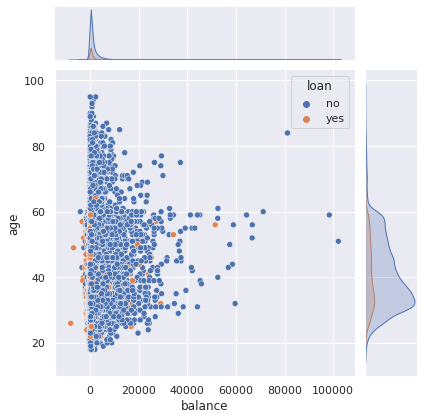

In [303]:
sns.jointplot(x = "balance", y = "age",
             hue = "loan",
             data = train)

**This element does not affect the results directly**

## 4.6 Pdays column

In [304]:
train["pdays"].value_counts().head(20)

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 186       60
 189       60
 174       57
Name: pdays, dtype: int64

> **-1 means client was not previously contacted**

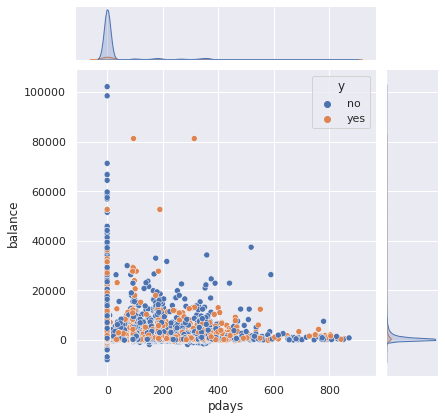

In [305]:
sns.jointplot(x = "pdays", y = "balance",
             hue = "y",
             data = train)

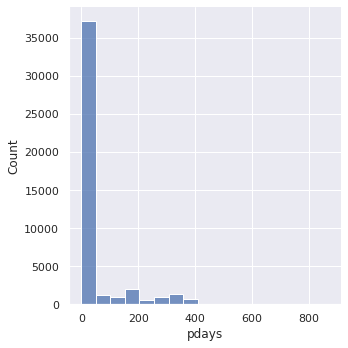

In [306]:
sns.displot(x = train["pdays"])

> **zero here refer into -1 in our data which mean client was not previously contacted**

In [307]:
the_most_frec = train[train["pdays"] == -1]
the_most_frec.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:>

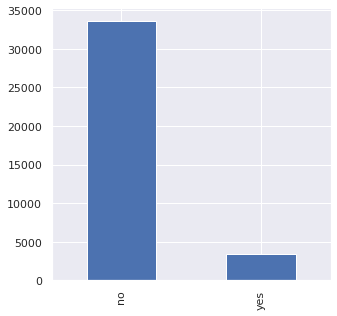

In [308]:
the_most_frec["y"].value_counts().plot.bar()

**We can say that the people who agreed to register in a term deposit and who belong to the category-1 were due to other factors that helped in this.**

## 5. CONCLUSION OF DATA ANALYSIS

**I will now stop extracting the features that can be characterized by people who accept registration in term deposits, and we can deduce the following from the features or features that we extracted are as follows:**

**In order to increase the chance of a person accepting to register in his deposit, he must have some characteristics such as**

> **To work in the field of management or work as an admin.**

> **To be married in the first place or divorced in the second place.**

> **To be tertiary education in the first place for workers in the management or secondary and in the second place for workers in the admin.**

> **Their ages range from 22 years old to 70 years old.**

> **As for the number of times the person/client is contacted, it is not effective unless the previous elements are available in the customer.**

> **With regard to the personal loan, this is not effective, and also the loan on the homes is also ineffective, because the term deposit is an investment that has a material return and thus will help the person pay loans and others.**

## 6. Data Preprocessing

In [309]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [310]:
# maping values in the default column
 
def default_to_num(df):
    if df['default'] == 'no':
        return 0
    elif df['default'] == 'yes':
        return 1
    else:
        return 99

In [311]:
train['default'] = train.apply(default_to_num, axis=1)
train["default"].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [312]:
# maping values in the target column
 
def target_to_num(df):
    if df['y'] == 'no':
        return 0
    elif df['y'] == 'yes':
        return 1
    else:
        return 99

In [313]:
train["y"] = train.apply(target_to_num, axis = 1)
train["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [314]:
# housing column

def housing_to_num(df):
    if df['housing'] == 'no':
        return 0
    if df['housing'] == 'yes':
        return 1
    else:
        return 99

In [315]:
train["housing"] = train.apply(housing_to_num, axis = 1)
train["housing"].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [316]:
# mapping loan column

def loan_to_num(df):
    if df['loan'] == 'no':
        return 0
    if df['loan'] == 'yes':
        return 1
    else:
        return 99

In [317]:
train["loan"] = train.apply(loan_to_num, axis = 1)
train["loan"].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [318]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


## 6.1 Feature selection

In [319]:
data = train.drop(['month','day'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0


In [320]:
categorical = train[['job', 'marital', 'education', 'contact','poutcome']]
numerical = train[['age','default','balance','housing','loan','duration', 'campaign', 'pdays', 'previous', 
             'y']]

In [321]:
target = numerical["y"]

## 6.2 Eleminate outliers

<AxesSubplot:>

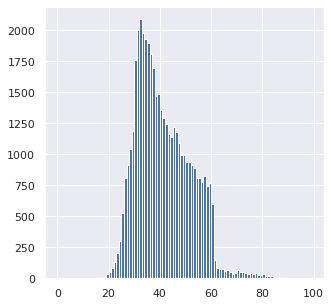

In [322]:
bin_values = np.arange(start = 0 , stop = 100 , step = 1)

data["age"].hist(bins=bin_values)

In [323]:
Q1 = train.age.quantile(0.25)
Q3 = train.age.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR+10
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(20.5, 70.5)

In [324]:
data[(data.age<lower_limit)|(data.age>upper_limit)].head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
2396,20,blue-collar,single,secondary,0,129,1,1,unknown,190,1,-1,0,unknown,0
2408,20,services,single,secondary,0,-103,1,0,unknown,180,1,-1,0,unknown,0
3160,20,student,single,tertiary,0,79,1,0,unknown,168,3,-1,0,unknown,0
4157,20,blue-collar,married,primary,0,-172,1,1,unknown,238,3,-1,0,unknown,0
4203,20,student,single,secondary,0,67,1,0,unknown,387,1,-1,0,unknown,0


In [325]:
# removing outliers
df_no_outlier = data[(data.age>lower_limit)&(data.age<upper_limit)]
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0


In [326]:
df_no_outlier["age"].min(), df_no_outlier["age"].max()

(21, 70)

In [327]:
# take a copy
data = df_no_outlier.copy()

## 6.3 Complete pre Processing and encoding our data

In [328]:
print('Categorical Data: ', categorical.shape)
print('Numerical Data: ', numerical.shape)

Categorical Data:  (45211, 5)
Numerical Data:  (45211, 10)


In [329]:
categorical.columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [330]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

In [331]:
# Transform categorical data into numerical data

le = LabelEncoder()

categorical['job'] = le.fit_transform(categorical['job'])
categorical['marital'] = le.fit_transform(categorical['marital'])
categorical['education'] = le.fit_transform(categorical['education'])
categorical['contact'] = le.fit_transform(categorical['contact'])
categorical['poutcome'] = le.fit_transform(categorical['poutcome'])

In [332]:
categorical.head()

,job,marital,education,contact,poutcome
0,4,1,2,2,3
1,9,2,1,2,3
2,2,1,1,2,3
3,1,1,3,2,3
4,11,2,3,2,3


In [333]:
categorical.skew()

job          0.261755
marital     -0.102826
education    0.197275
contact      0.769381
poutcome    -1.973561
dtype: float64

In [334]:
# Data Normalization

x_catnorm = MinMaxScaler().fit_transform(categorical)

In [335]:
chi_score, pvalue = chi2(x_catnorm, target)

In [336]:
chi_score , pvalue

(array([ 16.58656913,  14.88303326,  30.20590752, 626.90705466,
         34.89249311]),
 array([4.64790132e-005, 1.14387195e-004, 3.88524237e-008, 2.35240024e-138,
        3.48421648e-009]))

In [337]:
categ = categorical.columns
for i in range(len(categ)):
    print(categ[i], ': ', pvalue[i])

job :  4.647901318749266e-05
marital :  0.00011438719484978733
education :  3.885242371053226e-08
contact :  2.3524002410696316e-138
poutcome :  3.484216479910501e-09


In [338]:
numerical.skew()

age          0.684818
default      7.245375
balance      8.360308
housing     -0.224766
loan         1.852617
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
y            2.383480
dtype: float64

In [339]:
numeric = numerical.columns[:-1]
x_num = numerical[numeric]

In [340]:
x_num.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous
0,58,0,2143,1,0,261,1,-1,0
1,44,0,29,1,0,151,1,-1,0
2,33,0,2,1,1,76,1,-1,0
3,47,0,1506,1,0,92,1,-1,0
4,33,0,1,0,0,198,1,-1,0


In [341]:
# Data Normalization for numerical data

x_numnorm = MinMaxScaler().fit_transform(x_num)

In [342]:
# ANOVA

f_score, p_value = f_classif(x_numnorm, target)

In [343]:
f_score, p_value

(array([  28.62523309,   22.73392322,  126.57227551,  892.95057646,
         211.16739503, 8333.76114833,  243.35840443,  490.69656268,
         396.44398944]),
 array([8.82564369e-008, 1.86632653e-006, 2.52111369e-029, 2.62192657e-194,
        9.79365754e-048, 0.00000000e+000, 1.01234736e-054, 3.79055332e-108,
        7.80183035e-088]))

In [344]:
for i in range(len(numeric)):
    print(numeric[i], ': ', p_value[i])

age :  8.82564369173634e-08
default :  1.866326526158345e-06
balance :  2.521113691910737e-29
housing :  2.621926571845309e-194
loan :  9.793657535311501e-48
duration :  0.0
campaign :  1.0123473643070218e-54
pdays :  3.7905533194863624e-108
previous :  7.801830349573926e-88


## 7. CONCLUSION OF DATA PREPROCESSING 

> **All numerical features are significant variables because the P-Value < 0.05.**

## 8. Data Preprocessing for Building Models

> **training dataset**

In [345]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [346]:
train["job"] = le.fit_transform(train["job"])
train["marital"] = le.fit_transform(train['marital'])
train["education"] = le.fit_transform(train['education'])
train["contact"] = le.fit_transform(train['contact'])
train["poutcome"] = le.fit_transform(train['poutcome'])

In [347]:
train = train.drop(["day", "month"], axis = 1)

In [348]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0


In [349]:
features = train.drop("y", axis = 1)
features_num = features.columns
target = train["y"]

In [350]:
target.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [351]:
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features))

features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [352]:
features.columns = features_num

In [353]:
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


## 9. Saving our data

> **Saving our data with CSV extension**

In [354]:
train.to_csv("final_version.csv")

**Now the data is ready to be divided into training data and test data, and then building deep learning or machine learning algorithms.**